In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_name = "./data/loan_data_set.csv"
data = pd.read_csv(file_name)
df = pd.DataFrame(data)
df = df.replace("", np.nan)

A) Groupby the number of records based on the Dependent attributes and display their statistics.

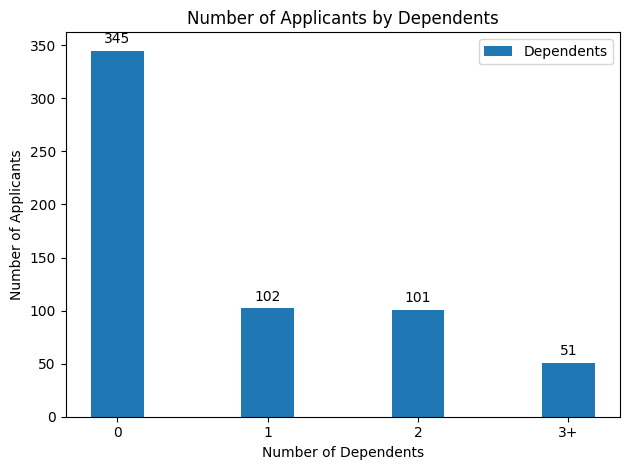

In [22]:
grp1 = df.groupby('Dependents').get_group('0')
grp2 = df.groupby('Dependents').get_group('1')
grp3 = df.groupby('Dependents').get_group('2')
grp4 = df.groupby('Dependents').get_group('3+')

labels = ["0","1", "2", "3+"]
values = [len(grp1), len(grp2), len(grp3), len(grp4)]

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(labels, values, width, label='Dependents')
ax.set_ylabel('Number of Applicants')
ax.set_xlabel('Number of Dependents')
ax.set_title('Number of Applicants by Dependents')
ax.set_xticks(x, labels)
ax.legend()
ax.bar_label(rects1, padding=3)
fig.tight_layout()
plt.show()

B) Groupby the numbers of records based on the ApplicantIncome attribute (1-10000 Group-1, 10001-
20000 Group-2 and 20001 to any amount- Group-3) and display frequency of such records.

C:\Users\Jeel Gajera\AppData\Local\Temp\ipykernel_11192\88875179.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gr1 = df.groupby('ApplicantIncome').apply(lambda df: df[getCondition1(1,10000)])
C:\Users\Jeel Gajera\AppData\Local\Temp\ipykernel_11192\88875179.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gr2 = df.groupby('ApplicantIncome').apply(lambda df: df[getCondition1(10001,20000)])
C:\Users\Jeel Gajera\AppData\Local\Temp\ipykernel_11192\88875179.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gr3 = df.groupby('ApplicantIncome').apply(lambda df: df[getCondition2(200001)])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


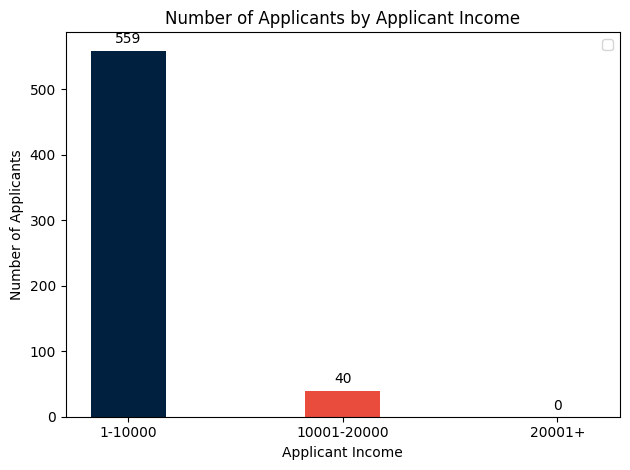

In [23]:
# conditon generator for ApplicantIncome
def getCondition1(val1, val2):
    c1 = df['ApplicantIncome'] > val1
    c2 = df['ApplicantIncome'] < val2
    return c1&c2
def getCondition2(val1):
    c1 = df['CoapplicantIncome'] > val1
    return c1
    
gr1 = df.groupby('ApplicantIncome').apply(lambda df: df[getCondition1(1,10000)])
gr2 = df.groupby('ApplicantIncome').apply(lambda df: df[getCondition1(10001,20000)])
gr3 = df.groupby('ApplicantIncome').apply(lambda df: df[getCondition2(200001)])

# plot the graph
labels = ["1-10000", "10001-20000", "20001+"]
values = [len(gr1), len(gr2), len(gr3)]
bar_color = ["#00203FFF", "#E94B3CFF","#ADEFD1FF"]
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(labels, values, width, color=bar_color)
ax.set_ylabel('Number of Applicants')
ax.set_xlabel('Applicant Income')
ax.set_title('Number of Applicants by Applicant Income')
ax.set_xticks(x, labels)
ax.legend()
ax.bar_label(rects1, padding=3)
fig.tight_layout()
plt.show()